### Approach
    1.Importing Data
    2.Inspecting the Dataframe
    3.Data Preparation (Encoding Categorical Variables, Handling Null Values)
    4.EDA (univariate analysis, outlier detection, checking data imbalance)
    5.Dummy Variable Creation
    6.Test-Train Split
    7.Feature Scaling
    8.Looking at Correlations
    9.Model Building (Feature Selection Using RFE, Improvising the model further inspecting adjusted R-squared, VIF and p-vales)
    10.Build final model
    11,Model evaluation with different metrics Sensitivity, Specificity

In [1]:
#importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


#reading the CSV
df=pd.read_csv('Leads.csv')

In [2]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.isnull().sum()/len(df)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [5]:
#understanding the spread of numerical values
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
for i in df.columns:
    print(df[i].value_counts())

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference         

In [7]:
# We can see that Columns have the value as Select which is ambiguous so replacing it with NA

df=df.replace('Select',np.nan)

In [8]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
l=round(df.isnull().mean()*100)
df_new=df[list(l[l<40].index)]

In [10]:
df_new.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


In [11]:
round(df_new.isnull().mean()*100)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [12]:
#dropping 'Prospect ID','Lead Number' as they are insignificant
df_new.drop(['Lead Number'],axis=1,inplace=True)

## Handling Null values

In [13]:
#Creating new value others for NAN in Specialization column
df_new.Specialization=df_new.Specialization.replace(np.nan,'others')
df_new.Specialization.value_counts(dropna=False)


others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

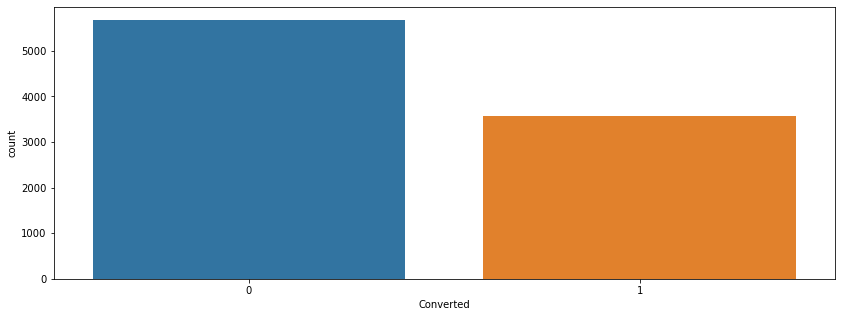

In [14]:
#Checking Converted as it is our Target variable
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Converted", data = df_new)
ax1.set_xticklabels(ax1.get_xticklabels())
plt.show()

#### We have around 30% of Conversion Rate

In [15]:
#Handling Nan values with mode

df_new.Tags.value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [16]:
df_new.Tags = df_new.Tags.replace(np.nan, 'Will revert after reading the email')

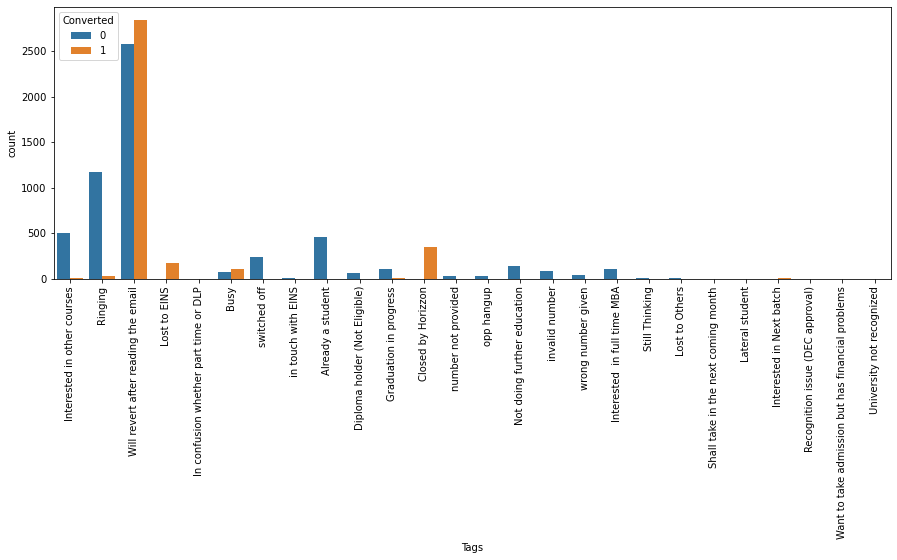

In [17]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df_new['Tags'], hue=df_new.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [18]:
#Combining lower frequency values
df_new.Tags = df_new.Tags.replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

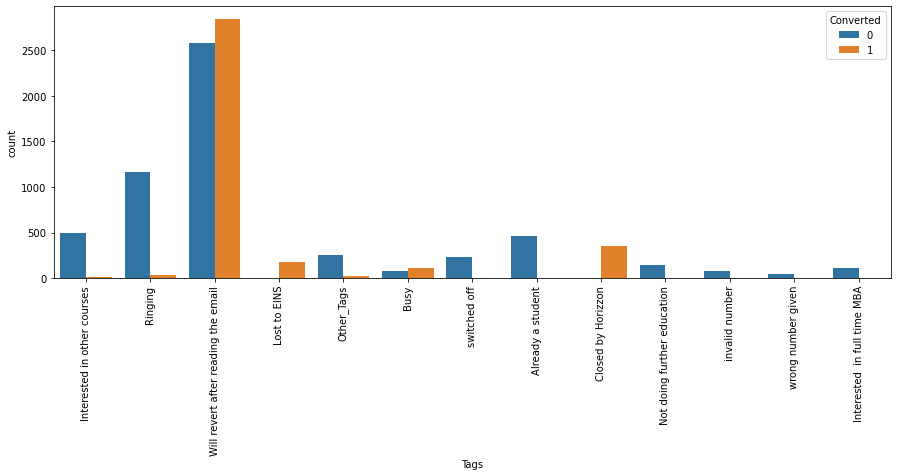

In [19]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df_new['Tags'], hue=df_new.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [20]:
df_new['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [21]:
df_new['What is your current occupation']=df_new['What is your current occupation'].replace(np.nan,df_new['What is your current occupation'].mode()[0])

In [22]:
df_new['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [23]:
df_new['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

### As we can see that the What matters most to you in choosing a course column is more skewed we can drop this column

In [24]:
df_new.drop('What matters most to you in choosing a course',axis=1,inplace=True)
round(df_new.isnull().mean()*100)

Prospect ID                                  0.0
Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  1.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         1.0
Last Activity                                1.0
Country                                     27.0
Specialization                               0.0
What is your current occupation              0.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisement                        0.0
Through Recommendations                      0.0
Receive More Updates

In [25]:
df_new.Country.value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [26]:
df_new.Country.mode()

0    India
Name: Country, dtype: object

In [27]:
df_new.Country=df_new.Country.replace(np.nan,df_new.Country.mode()[0])

In [28]:
#Replacing Country nan values with mode
df_new.Country.value_counts(dropna=False)

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [29]:
round(df_new.isnull().mean()*100)

Prospect ID                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [30]:
#dropping null rows from the dataframe

df_new.dropna(inplace = True)

In [31]:
round(df_new.isnull().mean()*100)

Prospect ID                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

#### Rows retained



In [32]:
round((len(df_new.index)/len(df))*100)

98

We have retained 98% of data from the original dataset

## Exploratory Data Analysis

In [33]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Origin                               9074 non-null   object 
 2   Lead Source                               9074 non-null   object 
 3   Do Not Email                              9074 non-null   object 
 4   Do Not Call                               9074 non-null   object 
 5   Converted                                 9074 non-null   int64  
 6   TotalVisits                               9074 non-null   float64
 7   Total Time Spent on Website               9074 non-null   int64  
 8   Page Views Per Visit                      9074 non-null   float64
 9   Last Activity                             9074 non-null   object 
 10  Country                             

In [34]:
df_new['Lead Source'] = df_new['Lead Source'].replace(np.nan,'Others')
df_new['Lead Source'] = df_new['Lead Source'].replace('google','Google')
df_new['Lead Source'] = df_new['Lead Source'].replace('Facebook','Social Media')
df_new['Lead Source'] = df_new['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')  

df_new['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Social Media          33
Others                19
Live Chat              2
Name: Lead Source, dtype: int64

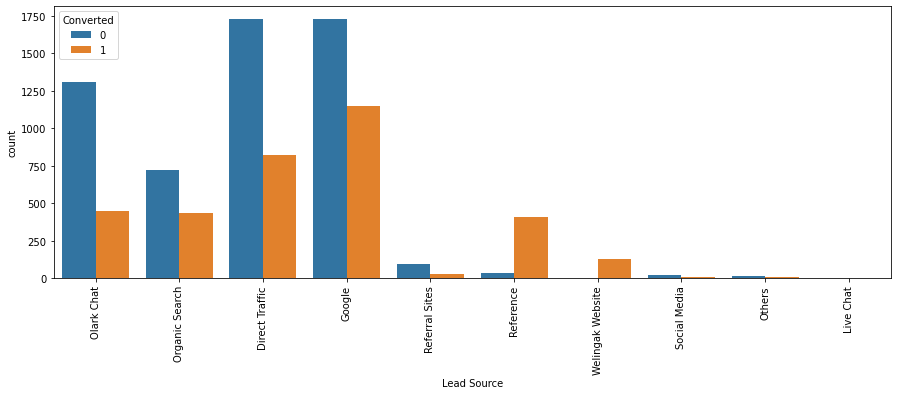

In [35]:
#visualizing count of Lead Source Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(df_new['Lead Source'], hue=df_new.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### OBSERVATION:

    1.The count of leads from the Google and Direct Traffic is maximum
    2.The conversion rate of the leads from Reference and Welingak Website is maximum
To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak Website'

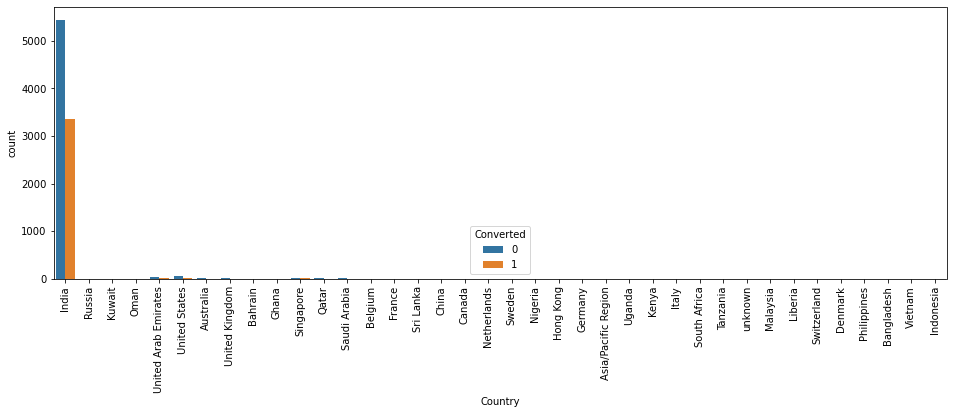

In [36]:
#visualizing count of Country Variable based on Converted value
plt.figure(figsize=(16,5))
s1=sns.countplot(df_new['Country'], hue=df_new.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

We can see that most of the data is incline towards india so we can consider india as major source of leads and can drop the column

In [37]:
df_new.drop('Country',axis=1,inplace=True)

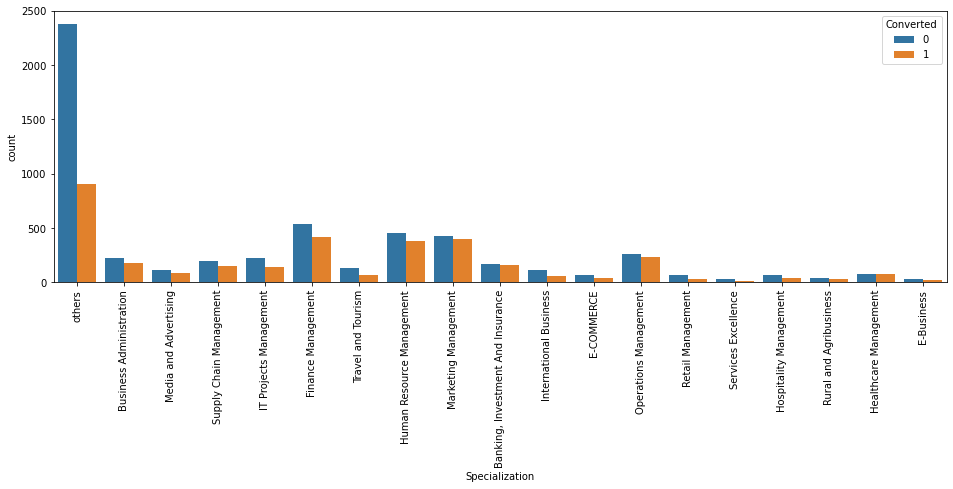

In [38]:
#visualizing count of Specialization Variable based on Converted value
plt.figure(figsize=(16,5))
s1=sns.countplot(df_new['Specialization'], hue=df_new.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

People from management background are more likely to convert from their stream

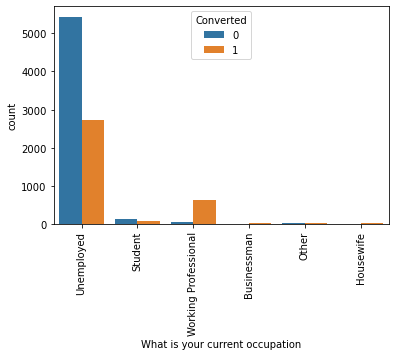

In [39]:
#visualizing count of Occupation Variable based on Converted value

s1=sns.countplot(df_new['What is your current occupation'], hue=df_new.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

COnversion rate is more in working professionals and total leads are more in unemployed people

In [40]:
#combining low frequency values

df_new['Last Activity'] = df_new['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

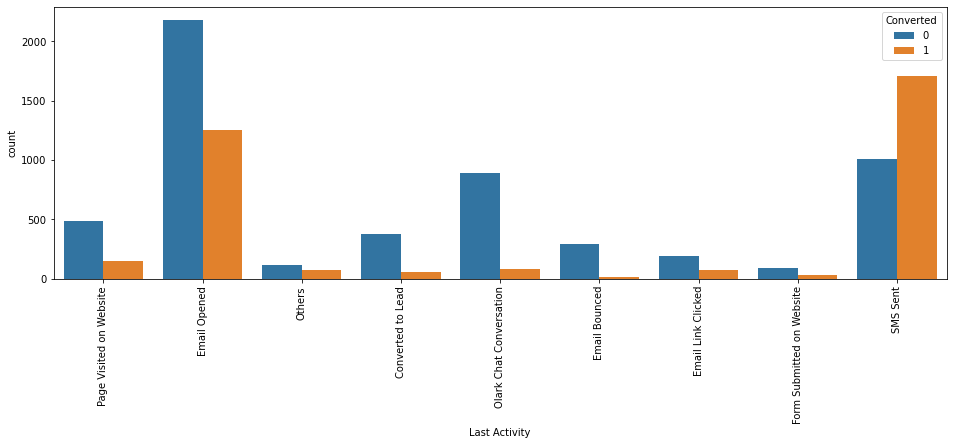

In [41]:
#visualizing count of Tags Variable based on Converted value
plt.figure(figsize=(16,5))
s1=sns.countplot(df_new['Last Activity'], hue=df_new.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

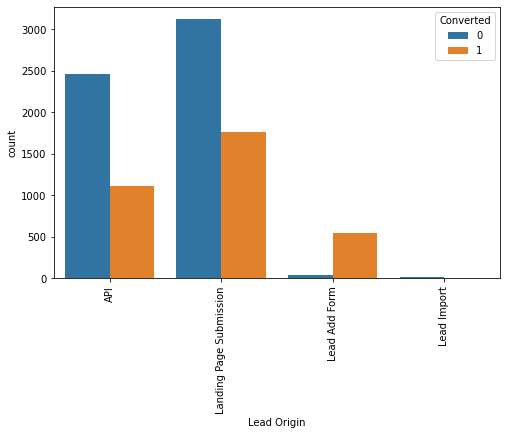

In [42]:
#visualizing count of Lead origin Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(df_new['Lead Origin'], hue=df_new.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

1)API and Landing Page Submission bring higher number of leads as well as conversion.

2)Lead Add Form has a very high conversion rate but count of leads are not very high.

3)In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

In [43]:
#clubbing lower frequency values
df_new['Last Notable Activity'] = df_new['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')
df_new['Last Notable Activity'].value_counts()

Modified                   3267
Email Opened               2823
SMS Sent                   2152
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      158
Name: Last Notable Activity, dtype: int64

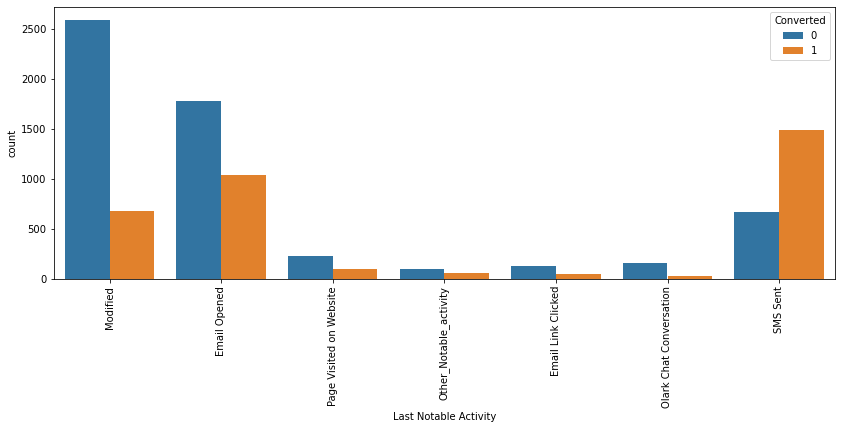

In [44]:
#visualizing count of Last Notable Activity Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df_new)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

### OBSERVATION:

    1.The count of last activity as "Email Opened" is max
    2.The conversion rate of SMS sent as last activity is maximum
    We should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent

----------------------------------------
column:Do Not Call
No     9072
Yes       2
Name: Do Not Call, dtype: int64
----------------------------------------


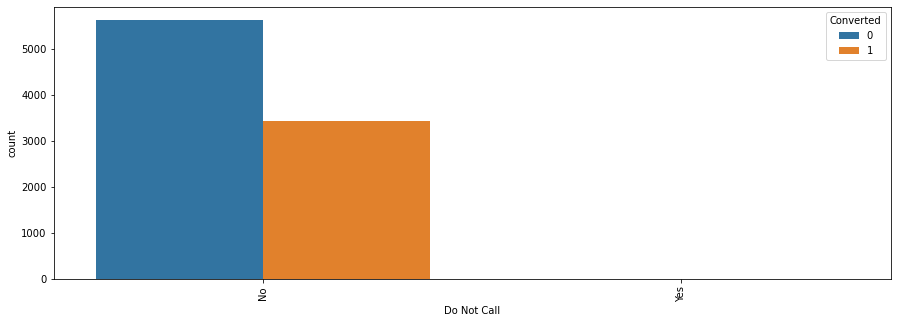

----------------------------------------
column:Search
No     9060
Yes      14
Name: Search, dtype: int64
----------------------------------------


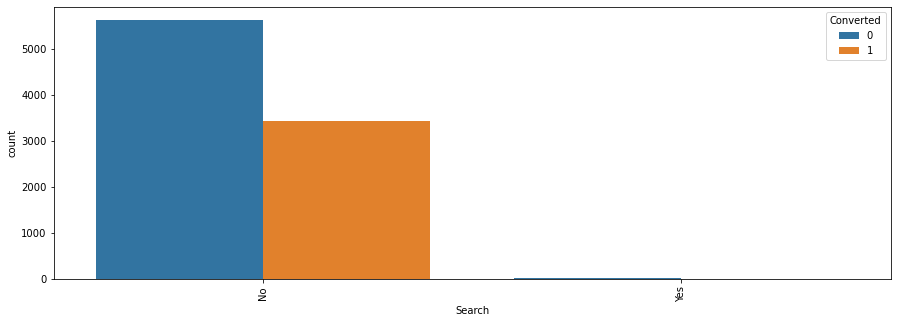

----------------------------------------
column:Magazine
No    9074
Name: Magazine, dtype: int64
----------------------------------------


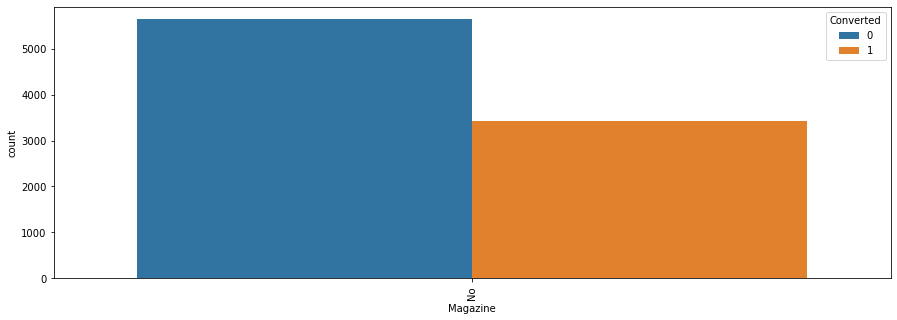

----------------------------------------
column:Newspaper Article
No     9072
Yes       2
Name: Newspaper Article, dtype: int64
----------------------------------------


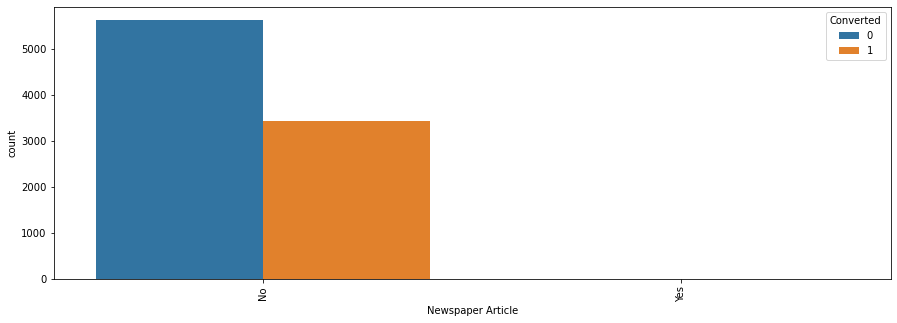

----------------------------------------
column:X Education Forums
No     9073
Yes       1
Name: X Education Forums, dtype: int64
----------------------------------------


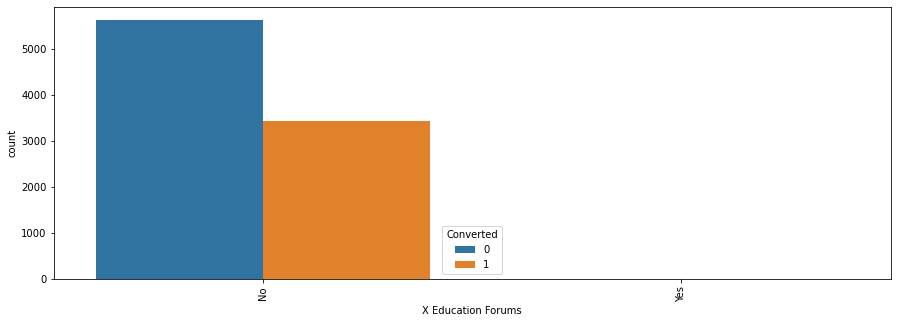

----------------------------------------
column:Newspaper
No     9073
Yes       1
Name: Newspaper, dtype: int64
----------------------------------------


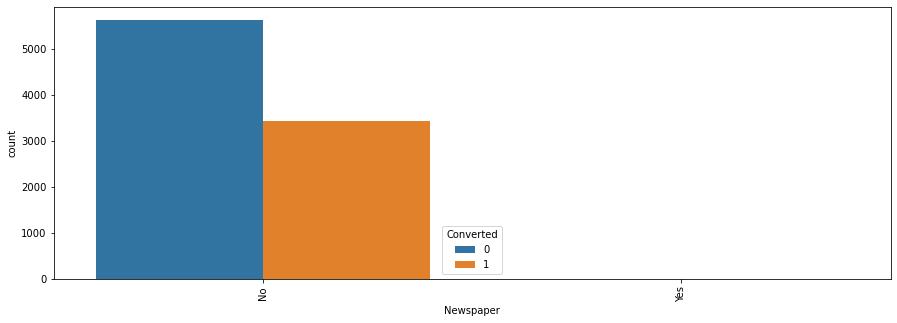

----------------------------------------
column:Digital Advertisement
No     9070
Yes       4
Name: Digital Advertisement, dtype: int64
----------------------------------------


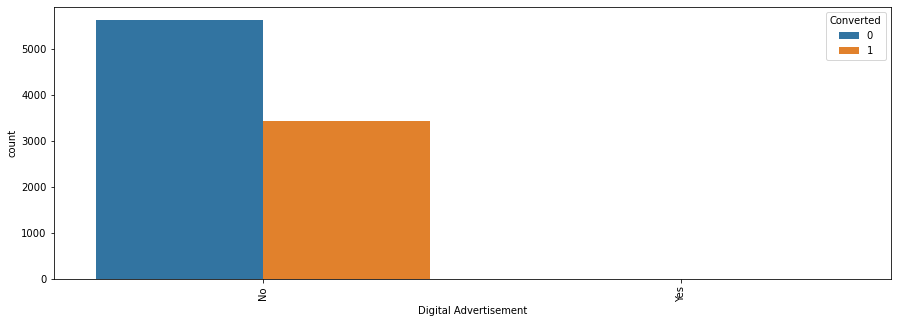

----------------------------------------
column:Through Recommendations
No     9067
Yes       7
Name: Through Recommendations, dtype: int64
----------------------------------------


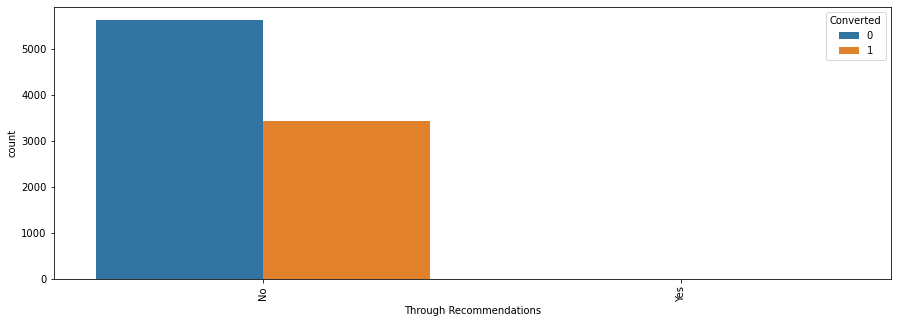

----------------------------------------
column:Receive More Updates About Our Courses
No    9074
Name: Receive More Updates About Our Courses, dtype: int64
----------------------------------------


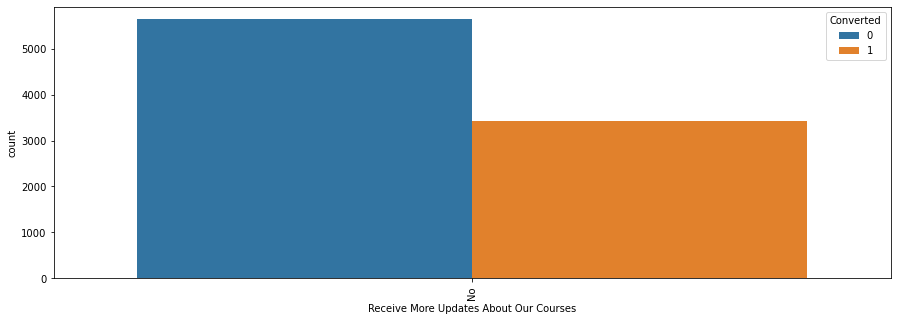

----------------------------------------
column:Update me on Supply Chain Content
No    9074
Name: Update me on Supply Chain Content, dtype: int64
----------------------------------------


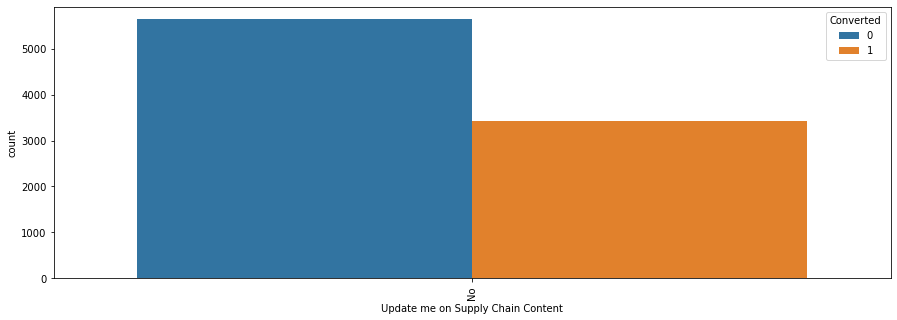

----------------------------------------
column:Get updates on DM Content
No    9074
Name: Get updates on DM Content, dtype: int64
----------------------------------------


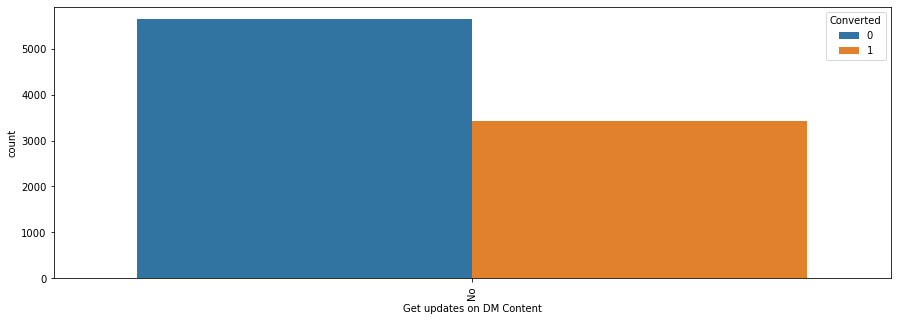

----------------------------------------
column:I agree to pay the amount through cheque
No    9074
Name: I agree to pay the amount through cheque, dtype: int64
----------------------------------------


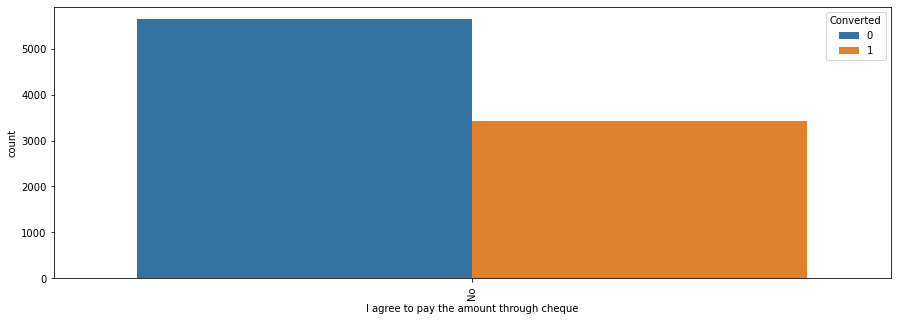

In [45]:
#Checking for skewness in multiple columns

for i in [ 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']:
    print('----------------------------------------')
    print(f'column:{i}')
    print(df_new[i].value_counts(dropna=False))
    print('----------------------------------------')
    plt.figure(figsize=(15,5))
    s1=sns.countplot(df_new[i], hue=df_new.Converted)
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    plt.show()

From the above we can see that all the columns are having most number of one values so we can drop these as they all are skewed

In [46]:
#dropping the skewed columns
df_new.drop([ 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque'],axis=1,inplace=True)

In [47]:
df_new.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

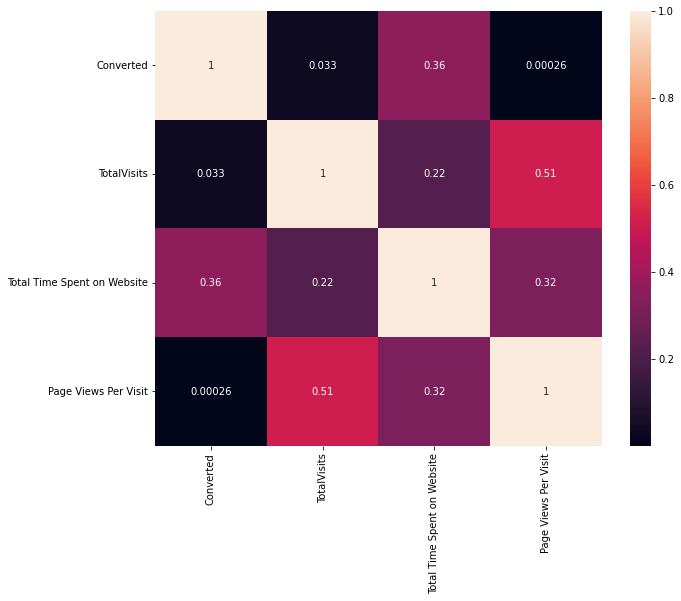

In [48]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df_new.corr(),annot=True)
plt.show()

The heat map is not showing any much inferences for numerical values. Though there is a slight correlation between Total views and page views per visit. 

In [49]:
cat_cols= df_new.select_dtypes(include=['object']).columns
cat_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [50]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df_new[['Lead Origin', 'Lead Source','Tags', 'Do Not Email', 'Last Activity', 'What is your current occupation']], drop_first=True)
# Add the results to the master dataframe
df_final = pd.concat([df_new, dummy], axis=1)
df_final

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,others,...,0,0,0,1,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.50,Email Opened,others,...,0,0,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,...,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Others,Media and Advertising,...,0,0,1,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,others,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Others,IT Projects Management,...,0,0,1,0,0,0,0,0,1,0
9236,82a7005b-7196-4d56-95ce-a79f937a158d,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,...,0,0,0,0,1,0,0,0,1,0
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,...,0,0,0,0,1,0,0,0,1,0
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,...,0,0,0,0,1,0,0,0,1,0


In [51]:
# Creating dummy variable separately for the variable 'Specialization' 
dummy_spl = pd.get_dummies(df_new['Specialization'], prefix = 'Specialization')
df_final = pd.concat([df_final, dummy_spl], axis = 1)

In [52]:
df_final.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,others,...,0,0,0,0,0,0,0,0,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,Email Opened,others,...,0,0,0,0,0,0,0,0,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,others,...,0,0,0,0,0,0,0,0,0,1


In [53]:
df_final = df_final.drop(['Prospect ID','Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation','Tags',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [54]:
# Import the required library

from sklearn.model_selection import train_test_split

# Split the dataset into 70% train and 30% test
X=df_final.drop('Converted',axis=1)
y = df_final['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [55]:
from sklearn.preprocessing import StandardScaler

# Scale the three numeric features present in the dataset

scaler = StandardScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others
3009,-0.284595,-0.160255,-0.179666,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,-0.284595,-0.540048,-0.179666,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9226,-0.671384,-0.888650,-1.132538,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4750,-0.284595,1.643304,-0.179666,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7987,0.295588,2.017593,0.058552,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


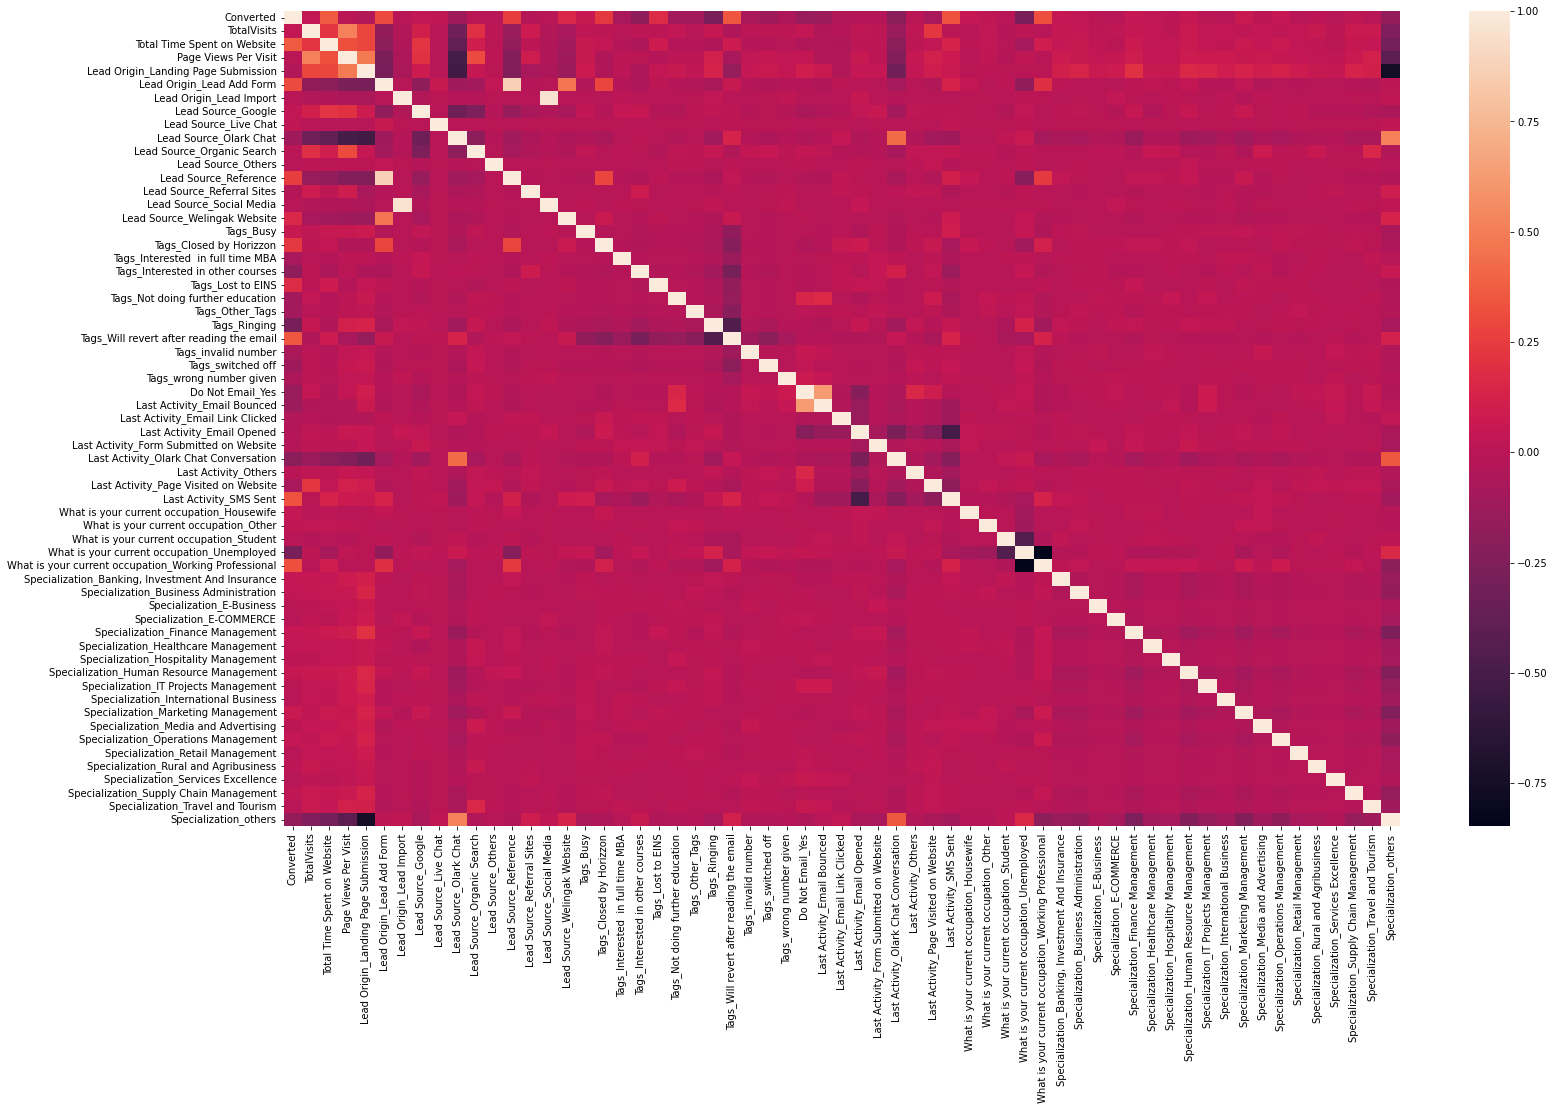

In [56]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(df_final.corr())
plt.show()

# Model Building

In [57]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

In [58]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(logr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [59]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 30),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 37),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 6),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 24),
 ('Lead Source_Olark Chat', False, 7),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Others', False, 28),
 ('Lead Source_Reference', False, 9),
 ('Lead Source_Referral Sites', False, 44),
 ('Lead Source_Social Media', False, 16),
 ('Lead Source_Welingak Website', True, 1),
 ('Tags_Busy', True, 1),
 ('Tags_Closed by Horizzon', True, 1),
 ('Tags_Interested  in full time MBA', False, 10),
 ('Tags_Interested in other courses', False, 11),
 ('Tags_Lost to EINS', True, 1),
 ('Tags_Not doing further education', False, 8),
 ('Tags_Other_Tags', False, 29),
 ('Tags_Ringing', True, 1),
 ('Tags_Will revert after reading the email', True, 1),
 ('Tags_invalid number', False, 

In [60]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [61]:
# Import statsmodels

import statsmodels.api as sm
# Fit a logistic Regression model on X_train after adding a constant and output the summary
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1761.4
Date:                Tue, 09 Aug 2022   Deviance:                       3522.8
Time:                        16:46:40   Pearson chi2:                 9.00e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5408
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.6905      0.264     -2.614      0.009      -1.208      -0.173
Total Time Spent on Website                    1.0401      0.048     21.750      0.000       0.946       1.134
Lead Origin_Landing Page Submission           -1.8525      0.157    -11.762      0.000      -2.161      -1.544
Lead Origin_Lead Add Form                      2.4352      0.321      7.577      0.000       1.805       3.065
Lead Source_Welingak Website                   2.1152      0.797      2.654      0.008       0.553       3.677
Tags_Busy                                      3.3541      0.296     11.339      0.000       2.774       3.934
Tags_Closed by Horizzon                        8.5547      0.756     11.315      0.000       7.073      10.037
Tags_Lost to EINS                              8.3398      0.755     11.051      0.000       6.861       9.819
Tags_Ringing                                  -0.5782      0.308     -1.880      0.060      -1.181       0.025
Tags_Will revert after reading the email       3.9348      0.198     19.878      0.000       3.547       4.323
Do Not Email_Yes                              -1.8584      0.205     -9.069      0.000      -2.260      -1.457
Last Activity_Olark Chat Conversation         -1.3022      0.191     -6.812      0.000      -1.677      -0.928
Last Activity_Others                           1.3733      0.285      4.813      0.000       0.814       1.932
Last Activity_SMS Sent                         1.9253      0.097     19.778      0.000       1.735       2.116
What is your current occupation_Unemployed    -2.3295      0.200    -11.638      0.000      -2.722      -1.937
Specialization_others                         -1.5400      0.157     -9.806      0.000      -1.848      -1.232
==============================================================================================================
"""

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,What is your current occupation_Unemployed,7.27
1,Lead Origin_Landing Page Submission,4.47
14,Specialization_others,3.65
8,Tags_Will revert after reading the email,3.44
2,Lead Origin_Lead Add Form,1.78
12,Last Activity_SMS Sent,1.67
7,Tags_Ringing,1.63
10,Last Activity_Olark Chat Conversation,1.36
3,Lead Source_Welingak Website,1.35
5,Tags_Closed by Horizzon,1.26


In [63]:
# dropping Tags_Ringing as it has high p value
col = col.drop('Tags_Ringing',1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'What is your current occupation_Unemployed',
       'Specialization_others'],
      dtype='object')

In [64]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1763.2
Date:                Tue, 09 Aug 2022   Deviance:                       3526.4
Time:                        16:46:40   Pearson chi2:                 9.13e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5406
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.8468      0.259     -3.271      0.001      -1.354      -0.339
Total Time Spent on Website                    1.0376      0.048     21.730      0.000       0.944       1.131
Lead Origin_Landing Page Submission           -1.8798      0.158    -11.916      0.000      -2.189      -1.571
Lead Origin_Lead Add Form                      2.3955      0.315      7.598      0.000       1.778       3.013
Lead Source_Welingak Website                   2.1526      0.794      2.710      0.007       0.596       3.709
Tags_Busy                                      3.6083      0.270     13.376      0.000       3.080       4.137
Tags_Closed by Horizzon                        8.7972      0.747     11.769      0.000       7.332      10.262
Tags_Lost to EINS                              8.5814      0.746     11.500      0.000       7.119      10.044
Tags_Will revert after reading the email       4.1796      0.161     25.936      0.000       3.864       4.495
Do Not Email_Yes                              -1.8516      0.205     -9.029      0.000      -2.253      -1.450
Last Activity_Olark Chat Conversation         -1.3014      0.192     -6.795      0.000      -1.677      -0.926
Last Activity_Others                           1.3652      0.285      4.785      0.000       0.806       1.924
Last Activity_SMS Sent                         1.9070      0.097     19.719      0.000       1.717       2.097
What is your current occupation_Unemployed    -2.3897      0.202    -11.823      0.000      -2.786      -1.994
Specialization_others                         -1.5643      0.157     -9.945      0.000      -1.873      -1.256
==============================================================================================================
"""

In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,6.79
1,Lead Origin_Landing Page Submission,4.30
13,Specialization_others,3.59
7,Tags_Will revert after reading the email,2.59
2,Lead Origin_Lead Add Form,1.76
11,Last Activity_SMS Sent,1.63
9,Last Activity_Olark Chat Conversation,1.36
3,Lead Source_Welingak Website,1.34
0,Total Time Spent on Website,1.24
5,Tags_Closed by Horizzon,1.22


In [66]:
#dropping What is your current occupation_Unemployed as it high VIF
col = col.drop('What is your current occupation_Unemployed',1)

In [67]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1854.4
Date:                Tue, 09 Aug 2022   Deviance:                       3708.9
Time:                        16:46:41   Pearson chi2:                 8.62e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5272
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.8952      0.197    -14.712      0.000      -3.281      -2.510
Total Time Spent on Website                  1.0485      0.047     22.423      0.000       0.957       1.140
Lead Origin_Landing Page Submission         -1.9721      0.155    -12.751      0.000      -2.275      -1.669
Lead Origin_Lead Add Form                    2.5556      0.312      8.199      0.000       1.945       3.166
Lead Source_Welingak Website                 1.9362      0.792      2.444      0.015       0.383       3.489
Tags_Busy                                    3.4359      0.268     12.839      0.000       2.911       3.960
Tags_Closed by Horizzon                      8.7423      0.743     11.764      0.000       7.286      10.199
Tags_Lost to EINS                            8.4432      0.744     11.348      0.000       6.985       9.901
Tags_Will revert after reading the email     4.1791      0.158     26.426      0.000       3.869       4.489
Do Not Email_Yes                            -1.8025      0.198     -9.126      0.000      -2.190      -1.415
Last Activity_Olark Chat Conversation       -1.3341      0.187     -7.123      0.000      -1.701      -0.967
Last Activity_Others                         1.3348      0.277      4.819      0.000       0.792       1.878
Last Activity_SMS Sent                       1.8520      0.094     19.719      0.000       1.668       2.036
Specialization_others                       -1.8333      0.155    -11.794      0.000      -2.138      -1.529
============================================================================================================
"""

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Tags_Will revert after reading the email,2.48
12,Specialization_others,2.04
1,Lead Origin_Landing Page Submission,1.96
2,Lead Origin_Lead Add Form,1.74
11,Last Activity_SMS Sent,1.62
3,Lead Source_Welingak Website,1.34
9,Last Activity_Olark Chat Conversation,1.34
0,Total Time Spent on Website,1.23
5,Tags_Closed by Horizzon,1.21
8,Do Not Email_Yes,1.13


Both P-Values and VIF are looking good so we can consider this as our final model

In [69]:
y_train_pred = res.predict(sm.add_constant(X_train[col]))
y_train_pred[:10]

3009    0.298133
1012    0.007464
9226    0.021706
4750    0.947188
7987    0.999471
1281    0.893307
2880    0.166281
4971    0.987736
7536    0.898909
1248    0.255923
dtype: float64

In [70]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
3009,0,0.298133
1012,0,0.007464
9226,0,0.021706
4750,1,0.947188
7987,1,0.999471


In [71]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
3009,0,0.298133,0
1012,0,0.007464,0
9226,0,0.021706,0
4750,1,0.947188,1
7987,1,0.999471,1


In [72]:
# Import metrics from sklearn for evaluation

from sklearn import metrics
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3526  379]
 [ 352 2094]]


In [73]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))


0.8849000157455519


In [74]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [75]:
# Calculate the sensitivity

TP/(TP+FN)

0.8560915780866721

In [76]:
# Calculate the specificity

TN/(TN+FP)

0.9029449423815621

In [77]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.0970550576184379


In [78]:
# positive predictive value 
print (TP / float(TP+FP))

0.8467448443186413


In [79]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9092315626611656


In [80]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [81]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

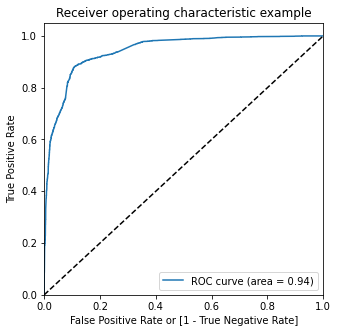

In [82]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [83]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final=y_train_pred_final.reset_index().rename(columns={'index':'Prospect ID'})
y_train_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,3009,0,0.298133,0,1,1,1,0,0,0,0,0,0,0
1,1012,0,0.007464,0,1,0,0,0,0,0,0,0,0,0
2,9226,0,0.021706,0,1,0,0,0,0,0,0,0,0,0
3,4750,1,0.947188,1,1,1,1,1,1,1,1,1,1,1
4,7987,1,0.999471,1,1,1,1,1,1,1,1,1,1,1


In [84]:
y_train_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,3009,0,0.298133,0,1,1,1,0,0,0,0,0,0,0
1,1012,0,0.007464,0,1,0,0,0,0,0,0,0,0,0
2,9226,0,0.021706,0,1,0,0,0,0,0,0,0,0,0
3,4750,1,0.947188,1,1,1,1,1,1,1,1,1,1,1
4,7987,1,0.999471,1,1,1,1,1,1,1,1,1,1,1


In [85]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.766651  0.978741  0.633803
0.2   0.2  0.822863  0.931316  0.754930
0.3   0.3  0.873091  0.901063  0.855570
0.4   0.4  0.886002  0.883483  0.887580
0.5   0.5  0.884900  0.856092  0.902945
0.6   0.6  0.859392  0.753066  0.925992
0.7   0.7  0.846481  0.670891  0.956466
0.8   0.8  0.829161  0.590352  0.978745
0.9   0.9  0.794206  0.488962  0.985403


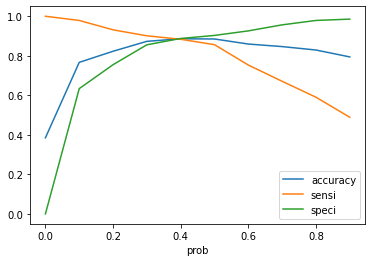

In [86]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [87]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,3009,0,0.298133,0,1,1,1,0,0,0,0,0,0,0,0
1,1012,0,0.007464,0,1,0,0,0,0,0,0,0,0,0,0
2,9226,0,0.021706,0,1,0,0,0,0,0,0,0,0,0,0
3,4750,1,0.947188,1,1,1,1,1,1,1,1,1,1,1,1
4,7987,1,0.999471,1,1,1,1,1,1,1,1,1,1,1,1


In [88]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8730908518343568

In [89]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3341,  564],
       [ 242, 2204]], dtype=int64)

In [90]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [91]:
TP / float(TP+FN)

0.9010629599345871

In [92]:
TN / float(TN+FP)

0.8555697823303458

In [93]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.796242774566474

In [94]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)


0.9010629599345871

### With Probability cut-off of 0.4 we have precision and recall rates as 79.62% and 90.10%

## Observation

    Accuracy:87.30%
    
    Sensitivity:90.10%
    
    Specificity:85.55%

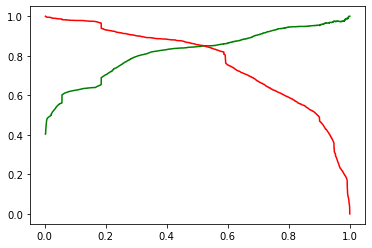

In [95]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [96]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others
3271,0.143722,-0.591008,0.716169,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1490,0.391416,1.894051,1.151248,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7936,-0.351665,-0.743117,-0.153989,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4216,-0.847051,-0.878732,-1.024147,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3830,1.134496,-0.578179,2.456484,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [97]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Will revert after reading the email,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_others
3271,-0.591008,0,0,0,0,0,0,1,0,0,0,0,1
1490,1.894051,1,0,0,0,0,0,1,0,0,0,0,0
7936,-0.743117,0,0,0,0,0,0,1,0,0,0,0,1
4216,-0.878732,0,1,0,0,1,0,0,0,0,0,0,0
3830,-0.578179,1,0,0,0,0,0,1,0,0,0,0,0


In [98]:
X_test_sm = sm.add_constant(X_test)

In [99]:
#PREDICTIONS ON TEST SET
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]


3271    0.237028
1490    0.785446
7936    0.209404
4216    0.999437
3830    0.215111
1800    0.187935
6507    0.024393
4821    0.011227
4223    0.949638
4714    0.594176
dtype: float64

In [100]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.237028
1490,0.785446
7936,0.209404
4216,0.999437
3830,0.215111


In [101]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [102]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [103]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.237028
1,1,1490,0.785446
2,0,7936,0.209404
3,1,4216,0.999437
4,0,3830,0.215111


In [104]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Prospect ID,Conversion_Prob
0,0,3271,0.237028
1,1,1490,0.785446
2,0,7936,0.209404
3,1,4216,0.999437
4,0,3830,0.215111


In [105]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Conversion_Prob']]
y_pred_final['Lead_Score'] = y_pred_final.Conversion_Prob.map( lambda x: round(x*100))

In [106]:
y_pred_final['final_Predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,Lead_Score,final_Predicted
0,3271,0,0.237028,24,0
1,1490,1,0.785446,79,1
2,7936,0,0.209404,21,0
3,4216,1,0.999437,100,1
4,3830,0,0.215111,22,0


In [107]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8626514873301506

In [108]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1469,  265],
       [ 109,  880]], dtype=int64)

In [109]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [110]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8897876643073812

In [111]:
# Let us calculate specificity
TN / float(TN+FP)

0.8471741637831603

In [112]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.7685589519650655

In [113]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8897876643073812

## Observation:
     
     
     Accuracy:86.26%
     
     Sensitivity:88.97%
     
     Specificty:84.71%
     
   ### With Cut-off of 0.41 we have precision and recall scores as 76.85 and 88.9% respectively
    

# Summary


    1.the logistic regression model is used to predict the probabilty of conversion of a customer.
    2.Optimum cut off is chosen to be 0.41 i.e. any lead with greater than 0.41 probability of converting is predicted as Hot Lead (customer will convert) and any lead with 0.41 or less probability of converting is predicted as Cold Lead (customer will not convert)
    3.Total Features used as 13 in number
    4.Features used in final model are 
            Tags_Will revert after reading the email
            Specialization_others
            Lead Origin_Landing Page Submission
            Lead Origin_Lead Add Form
            Last Activity_SMS Sent
            Lead Source_Welingak Website
            Last Activity_Olark Chat Conversation
            Total Time Spent on Website
            Tags_Closed by Horizzon
            Do Not Email_Yes
            Tags_Busy
            Tags_Lost to EINS
            Last Activity_Others

    5.When the following factors are met the conversion rates are high:
            1.Lead source was:
                a. Google
                b. Direct traffic
                c. Organic search
                d. Welingak website
            2.last activity was:
                a. SMS
                b. Olark chat conversation
            3.lead origin is Lead add format
            4.current occupation is as a working professional.
